# Q-3. 
Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following:

Link: https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

* Measure the dispersion in both and interpret the results.
* Calculate mean and 5% confidence interval and plot it in a graph
* Calculate the Mean absolute deviation and Standard deviation and interpret the results.
* Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [43]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Reading Data

The csv file in the given drive link was downloaded as *data.csv* and was loaded as a DataFrame

In [3]:
df = pd.read_csv('data.csv')
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [8]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

## Answers:

In [18]:
before = ' Blood Pressure Before (mmHg)'
after = ' Blood Pressure After (mmHg)'

samp_mean_before = np.mean(df[before])
samp_mean_after = np.mean(df[after])

samp_std_before = np.std(df[before], ddof = 1)
samp_std_after = np.std(df[after], ddof = 1)

## Measure the dispersion in both and interpret the results.

In [10]:
var_before = statistics.variance(df[before])
var_after = statistics.variance(df[after])
var_before, var_after

(43.53727272727273, 47.444848484848485)

We observe that the dispersion of the "Blood Pressure After" has higher variance compared to "Blood Pressure Before." This means that "BP After" shows more deviation from the mean i.e. it is more spread out compared to "BP Before"

## Calculate mean and 5% confidence interval and plot it in a graph

In [39]:
alpha = 0.05
z_alpha_by2 = stats.norm.ppf(alpha/2)
z_alpha_by2

-1.9599639845400545

**BLOOD PRESSURE BEFORE:**

In [40]:
moe_before = - z_alpha_by2 * (samp_mean_before/(samp_std_before*(1/2)))
lower_bound_before = round(samp_mean_before - moe_before, 2)
upper_bound_before = round(samp_mean_before + moe_before, 2)

print (f'Confidence interval for "BP Before" with 5% significance at [ mean {samp_mean_before} ] \nis between [ {lower_bound_before} and {upper_bound_before} ]')

Confidence interval for "BP Before" with 5% significance at [ mean 133.91 ] 
is between [ 54.36 and 213.46 ]


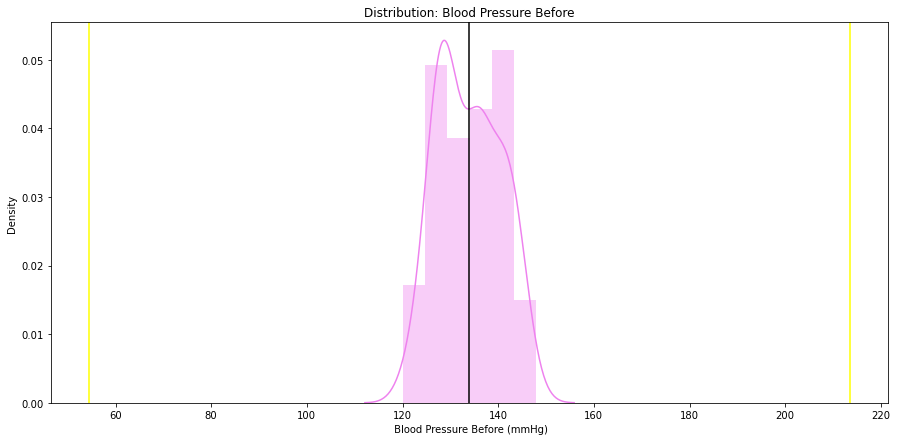

In [50]:
plt.figure(figsize=(15,7))
plt.title("Distribution: Blood Pressure Before")
sns.distplot(df[before], color = 'violet')
plt.axvline(x = lower_bound_before, color = 'yellow')
plt.axvline(x = upper_bound_before, color = 'yellow')
plt.axvline(x = samp_mean_before, color = 'black')
plt.show()

**BLOOD PRESSURE AFTER:**

In [41]:
moe_after = - z_alpha_by2 * (samp_mean_after/(samp_std_after*(1/2)))
lower_bound_after = round(samp_mean_after - moe_after, 2)
upper_bound_after = round(samp_mean_after + moe_after, 2)

print (f'Confidence interval for "BP after" with 5% significance at [ mean {samp_mean_after} ] \nis between [ {lower_bound_after} and {upper_bound_after} ]')

Confidence interval for "BP after" with 5% significance at [ mean 128.36 ] 
is between [ 55.31 and 201.41 ]


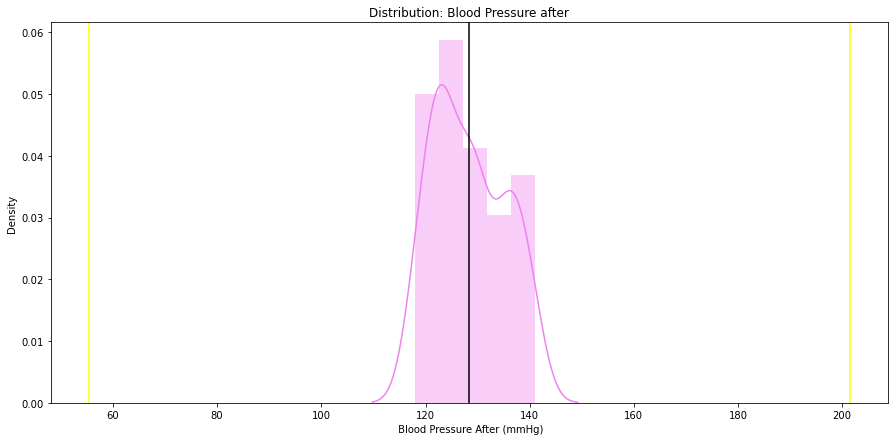

In [51]:
plt.figure(figsize=(15,7))
plt.title("Distribution: Blood Pressure after")
sns.distplot(df[after], color = 'violet')
plt.axvline(x = lower_bound_after, color = 'yellow')
plt.axvline(x = upper_bound_after, color = 'yellow')
plt.axvline(x = samp_mean_after, color = 'black')
plt.show()

## Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [61]:
# Before
mean_absolute_deviation_before = round(df[before].mad(),2)
standard_deviation_before = round(np.std(df[before]),2)

print("Blood Pressure Before")
print("Mean Absolute Deviation:\t", mean_absolute_deviation_before)
print("Standard Deviation:\t\t", standard_deviation_before)
print()

# After
mean_absolute_deviation_after = round(df[after].mad(),2)
standard_deviation_after = round(np.std(df[after]),2)

print("Blood Pressure after")
print("Mean Absolute Deviation:\t", mean_absolute_deviation_after)
print("Standard Deviation:\t\t", standard_deviation_after)

Blood Pressure Before
Mean Absolute Deviation:	 5.71
Standard Deviation:		 6.57

Blood Pressure after
Mean Absolute Deviation:	 5.9
Standard Deviation:		 6.85


In [58]:
6.85/6.57

1.0426179604261796

We observe initially that there is variablilty in blood pressures both before and after the treatment. This is evident by the MAD and Standard Deviation values of 5.71 and 6.57 for "Before" and, similarly 5.9 and 6.85 respectively for "After."

We also observe that there is a slight increase in the dispersion values after the treatment by a factor of 1.04, which means that the treatment might be affecting the BP of the participants. But to validate this claim we can do a paired t-test to ascertain the statistical significance of this change.

In [63]:
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(df[before], df[after])
t_statistic, p_value

(38.40500458621546, 2.817165090364283e-61)

We can see that if we take a significance level of 0.05%, the pvalue is much less than that and hence we can confirm that the two samples are statistically different from each other

## Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [67]:
df[[before,after]].corr(method = 'pearson')

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Blood Pressure Before (mmHg),1.000000,0.977949
Blood Pressure After (mmHg),0.977949,1.000000


In [68]:
df[[before,after]].corr(method = 'spearman')

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Blood Pressure Before (mmHg),1.000000,0.971425
Blood Pressure After (mmHg),0.971425,1.000000


In [70]:
df[[before,after]].corr(method = 'kendall')

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Blood Pressure Before (mmHg),1.000000,0.892577
Blood Pressure After (mmHg),0.892577,1.000000


From the above three correlation coefficients we can conclude that the two variables have a **very strong linear correlation** given high value of pearson's correlation coefficient, compared to Spearman's coefficient and Kendals tau coefficient.

To ascertain the statistical significance of this result. We test the pearsons corelation coefficient of **0.9779** at 1% significance.

In [71]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df[before], df[after])

corr_coef, p_value

(0.9779485966556027, 1.8097381433033208e-68)

In [72]:
p_value < 0.01

True

Since the p_value is less than the given significance level of 1%. Therefore, we can conclude that the correlation is **statistically significant** at a significance level of 1%. Which means that there is less than 1% probability of getting a correlation value this strong.